In [55]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [56]:
df = pd.read_csv('C:/Users/Trypt/Desktop/KBB/DB files/car_data_clean_complete_v4.csv')

In [57]:
df = df.drop(df[df["make_ss"] == "Panoz"].index | df[df["make_ss"] == "Daewoo"].index | df[df["make_ss"] == "Maybach"].index | df[df["make_ss"] == "AM General"].index | df[df["make_ss"] == "Geo"].index | df[df["make_ss"] == "Fisker"].index | df[df["make_ss"] == "Alfa Romeo"].index | df[df["make_ss"] == "Lotus"].index | df[df["make_ss"] == "McLaren"].index | df[df["make_ss"] == "Plymouth"].index | df[df["make_ss"] == "Isuzu"].index | df[df["make_ss"] == "Oldsmobile"].index | df[df["make_ss"] == "Lamborghini"].index | df[df["make_ss"] == "Rolls-Royce"].index | df[df["make_ss"] == "Aston Martin"].index | df[df["make_ss"] == "Saab"].index | df[df["make_ss"] == "smart"].index | df[df["make_ss"] == "Suzuki"].index | df[df["make_ss"] == "Infiniti"].index | df[df["make_ss"] == "Ferrari"].index | df[df["make_ss"] == "Bentley"].index | df[df["make_ss"] == "Maserati"].index | df[df["make_ss"] == "HUMMER"].index | df[df["make_ss"] == "Mercury"].index | df[df["make_ss"] == "Saturn"].index | df[df["make_ss"] == "FIAT"].index | df[df["make_ss"] == "Pontiac"].index | df[df["make_ss"] == "Jaguar"].index | df[df["make_ss"] == "Scion"].index | df[df["make_ss"] == "Mitsubishi"].index | df[df["make_ss"] == "Porsche"].index | df[df["make_ss"] == "Volvo"].index | df[df["make_ss"] == "MINI"].index | df[df["make_ss"] == "Land Rover"].index | df[df["make_ss"] == "Lincoln"].index)
expcars = (df['price_fs'] > 5000) & (df['price_fs'] < 100000)
df = df[expcars]
df = df.drop_duplicates(['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income'])
df["make_ss"].value_counts().sort_values(ascending = False)

Chevrolet        182008
Ford             175152
Toyota           116868
Nissan           103032
Honda             88502
Jeep              77083
Hyundai           56976
BMW               53184
GMC               53096
Lexus             52362
Dodge             46364
Kia               40702
Ram               38046
Mercedes-Benz     34725
Volkswagen        31070
Subaru            24737
Acura             24568
Cadillac          24238
Mazda             23527
Buick             22356
Chrysler          17699
Audi              16839
INFINITI          16031
Name: make_ss, dtype: int64

In [58]:
states = pd.DataFrame(df.groupby('State full').mean())

In [59]:
states = states.reset_index()

In [60]:
df["State full"].value_counts().sort_values(ascending = False)

North Carolina    145294
Florida           101586
Texas              98738
California         93505
Georgia            69999
Pennsylvania       59635
New York           58995
Virginia           57938
Ohio               57025
Illinois           47393
Michigan           41767
South Carolina     41745
Tennessee          38314
Wisconsin          37389
Maryland           34468
Indiana            30075
Missouri           30039
Washington         21847
Kentucky           21517
Kansas             20920
Colorado           20015
Minnesota          19370
Alabama            19019
Iowa               16026
Arizona            14111
Oklahoma           13525
Nebraska           12168
Oregon             11691
Arkansas           11471
Utah               11069
Mississippi         9988
Louisiana           8734
Nevada              6348
Idaho               5823
Delaware            5619
West Virginia       4349
South Dakota        4211
New Mexico          3394
North Dakota        3122
Montana             2986


In [62]:
statesmedian = pd.DataFrame(df.groupby('State full').median())
statesmedian = statesmedian.reset_index()
statesmedian

,State full,price_fs,miles_fs,year_is,engine_size_ss,doors_is,cylinders_is,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,AGE,zip,decommissioned,latitude,longitude,irs_estimated_population_2015,Population,Number of households
0,Alabama,19949.0,46656.0,2015.0,3.5,4.0,6.0,55.0,32.0,19990.0,30.0,0.0,4.0,35216.0,0.0,33.42,-86.79,32940.0,413188.0,155178.0
1,Arizona,18000.0,45063.0,2015.0,3.0,4.0,6.0,47.0,27.0,19547.0,25.0,0.0,4.0,85286.0,0.0,33.44,-111.92,30300.0,3889161.0,1411727.0
2,Arkansas,19877.0,47536.0,2015.0,3.5,4.0,6.0,66.0,33.0,19995.0,30.0,0.0,4.0,72396.0,0.0,35.31,-92.65,21620.0,207911.0,79214.0
3,California,19500.0,41141.0,2015.0,2.5,4.0,4.0,42.0,27.0,19950.0,25.0,0.0,4.0,93230.0,0.0,34.72,-119.06,37240.0,1812208.0,603879.0
4,Colorado,20639.0,49122.0,2015.0,3.5,4.0,6.0,48.0,31.0,20988.0,28.0,0.0,4.0,80501.0,0.0,39.64,-104.95,27340.0,540669.0,219562.0
5,Connecticut,16036.0,53092.5,2014.0,2.5,4.0,4.0,66.5,48.5,16494.0,46.0,0.0,5.0,6379.0,0.0,41.53,-72.65,21420.0,862611.0,328013.0
6,Delaware,19395.0,42910.0,2015.0,2.5,4.0,6.0,66.0,40.0,20120.0,38.0,0.0,4.0,19901.0,0.0,39.15,-75.57,29230.0,200632.0,76444.0
7,Florida,18476.0,41308.5,2015.0,2.5,4.0,4.0,45.0,26.0,18995.0,25.0,0.0,4.0,33142.0,0.0,27.94,-81.43,25080.0,872598.0,330897.0
8,Georgia,19987.0,43601.0,2015.0,3.0,4.0,6.0,50.0,30.0,19999.0,27.0,0.0,4.0,30265.0,0.0,33.95,-84.15,34770.0,700308.0,264496.0
9,Idaho,21988.0,48450.0,2015.0,3.6,4.0,6.0,72.0,43.0,22135.0,38.0,0.0,4.0,83704.0,0.0,43.63,-116.21,20750.0,105580.0,36066.0


In [63]:
states["median"] = statesmedian['price_fs']

In [111]:
sns.set(font_scale=2, rc={'figure.figsize':(18, 18)})

## Mean Car Price by State

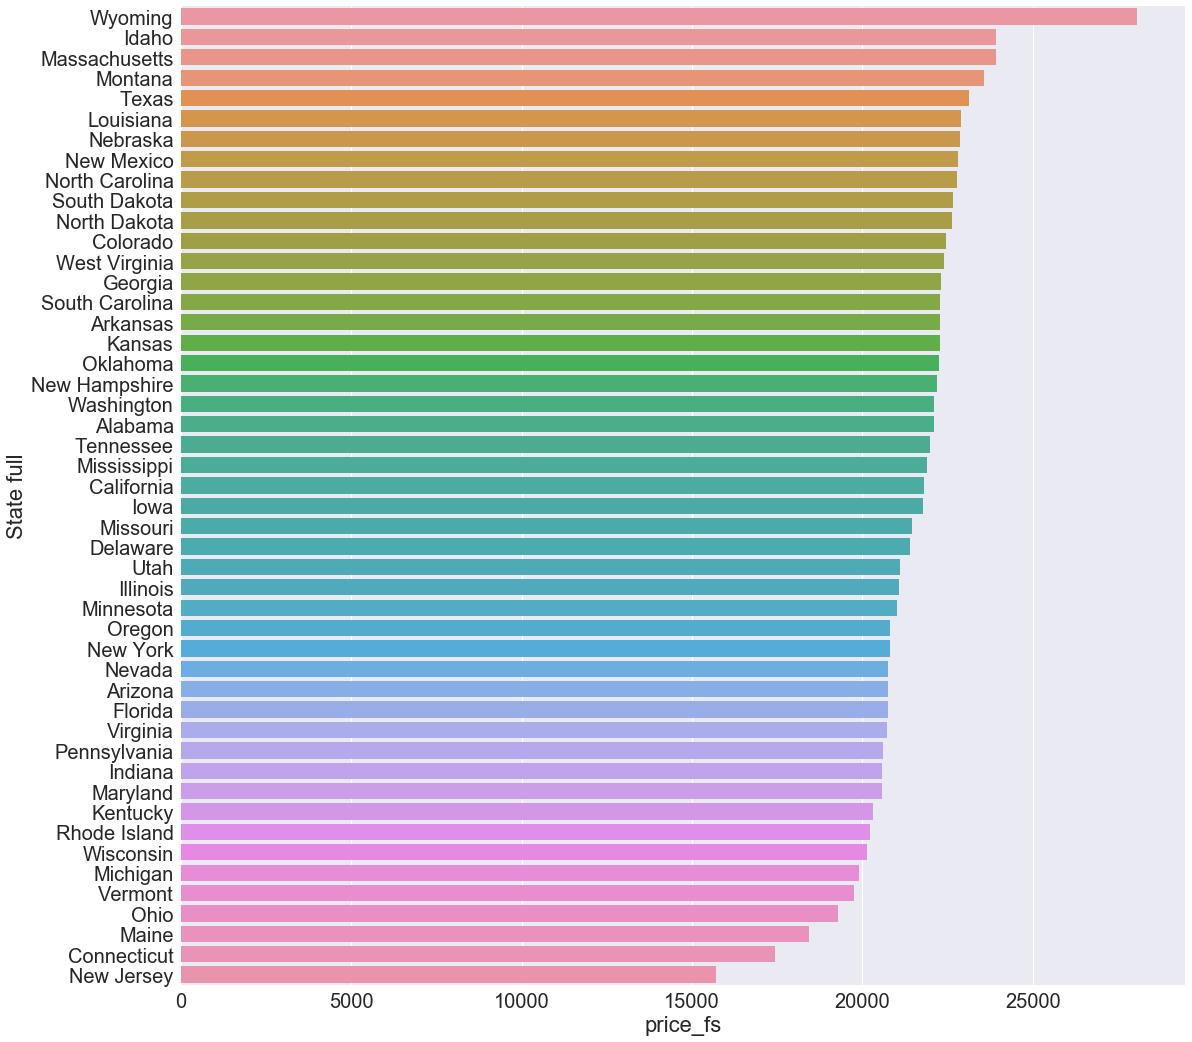

In [114]:
states.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=states, label="Mean")

## Median Car Price by State

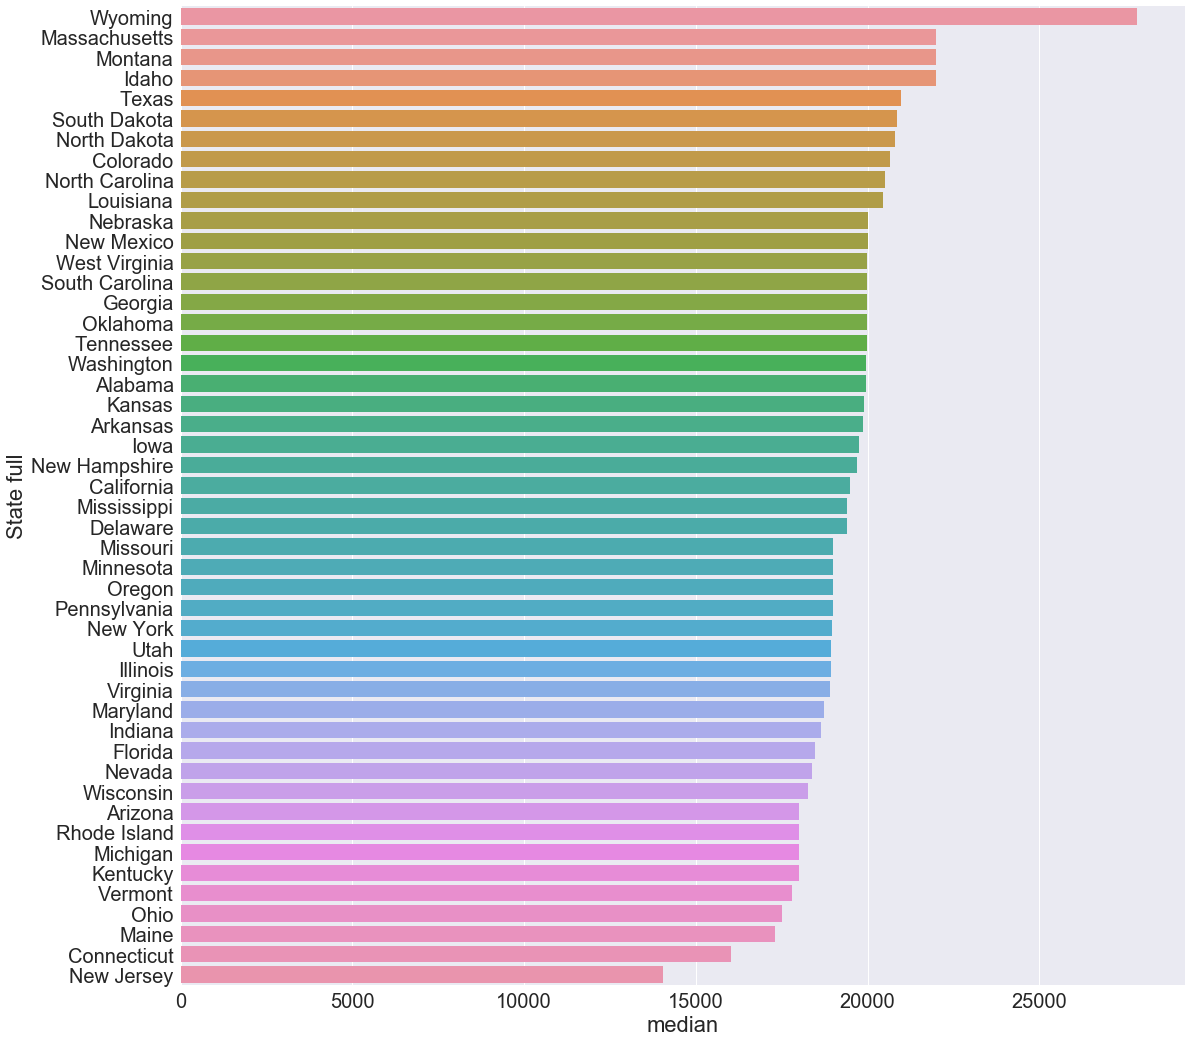

In [115]:
states.sort_values('median', ascending=False, inplace=True)
sns.barplot(x="median", y="State full", data=states, label="Mean")

## Mean and Median overlap Car Price by State

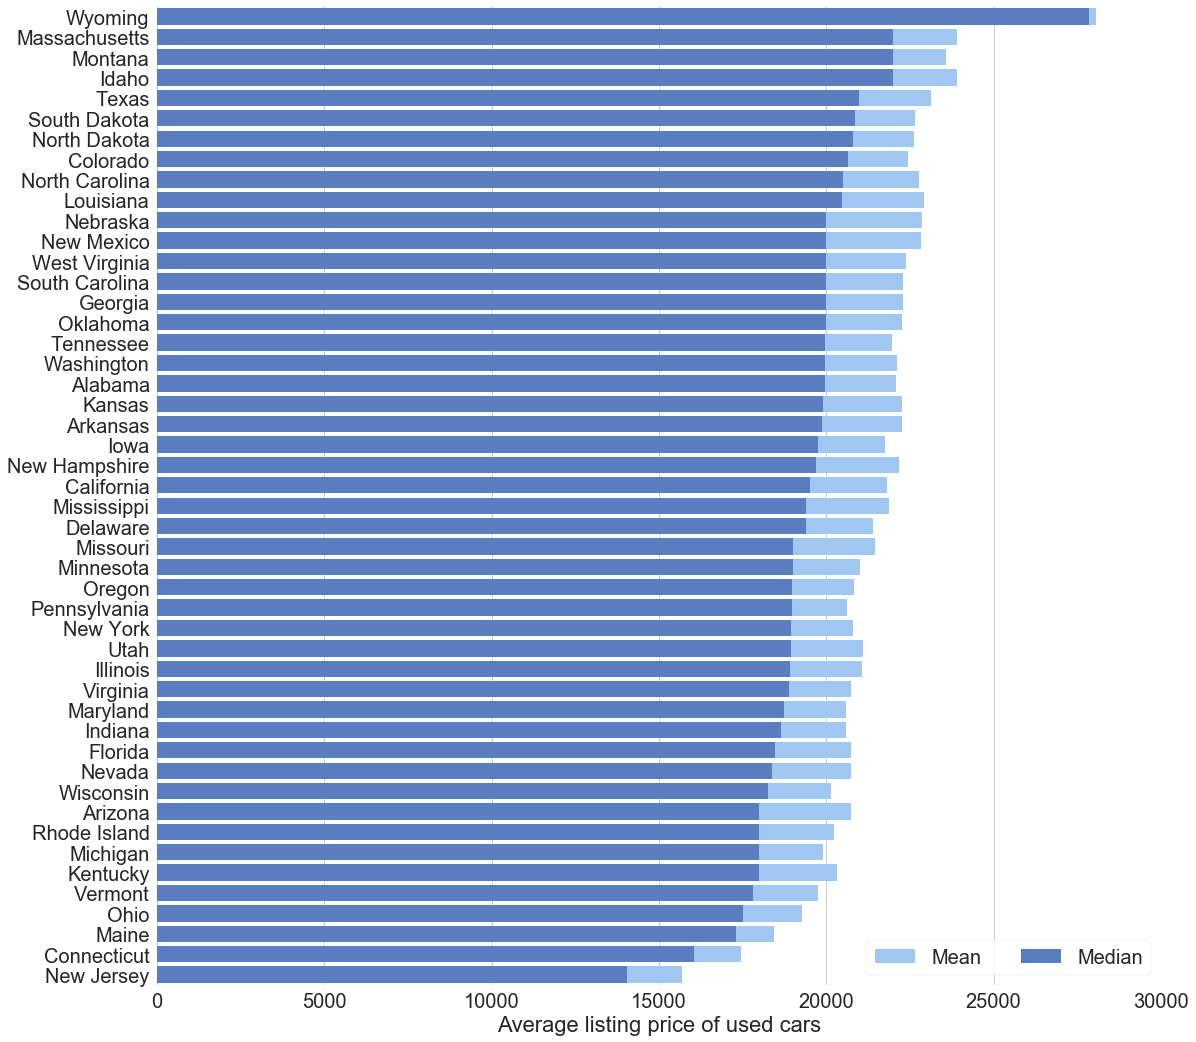

In [116]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 18))
sns.set_color_codes("pastel")
sns.barplot(x="price_fs", y="State full", data=states, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="State full", data=states, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,30000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

## Mean Car Price by Region

In [71]:
regions = pd.DataFrame(df.groupby('Regions').mean())
regions = regions.reset_index()
regionsmedian = pd.DataFrame(df.groupby('Regions').median())
regionsmedian = regionsmedian.reset_index()
regions["median"] = regionsmedian['price_fs']

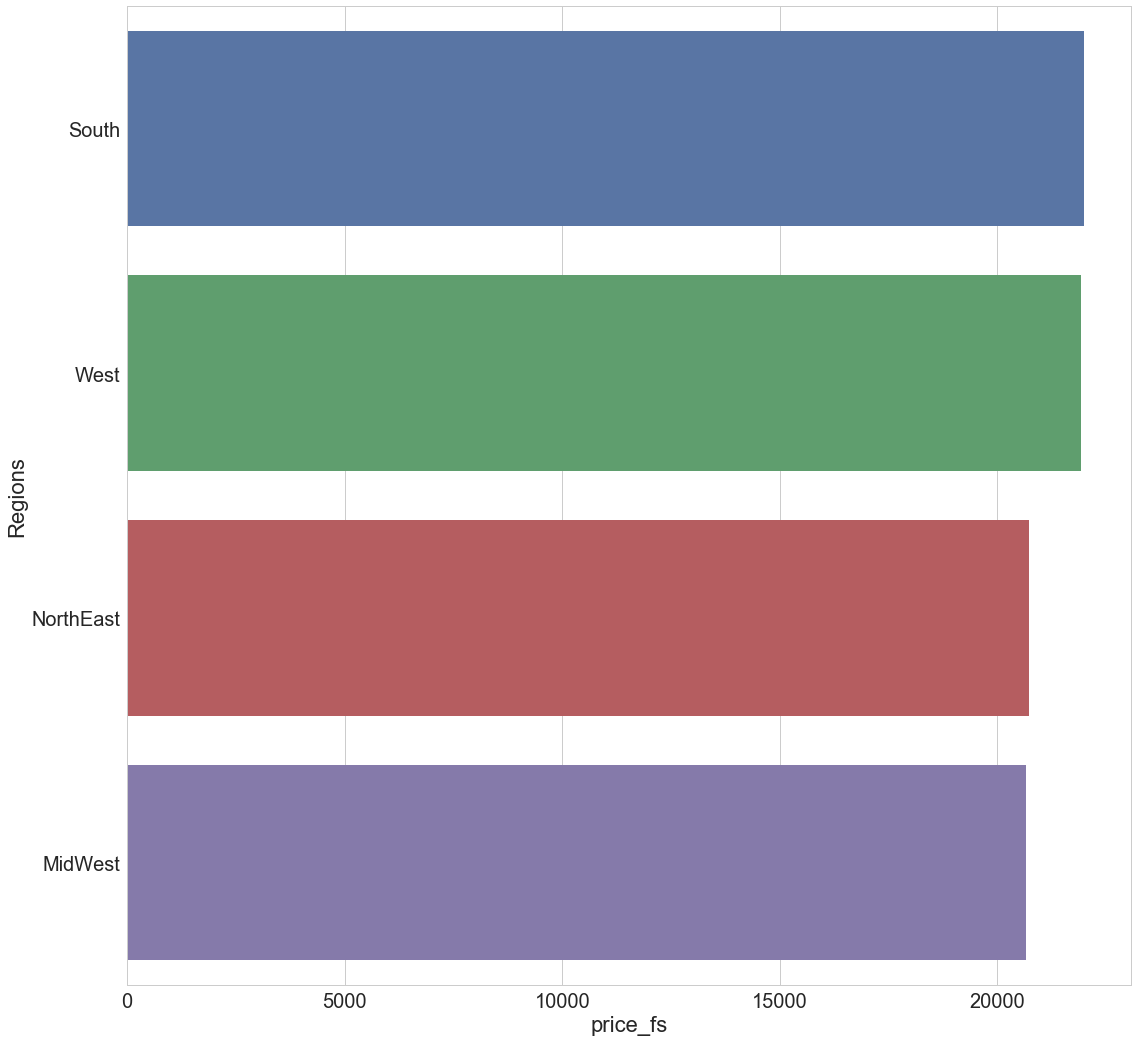

In [117]:
regions.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="Regions", data=regions, label="Mean")

## Median Car Price by Region

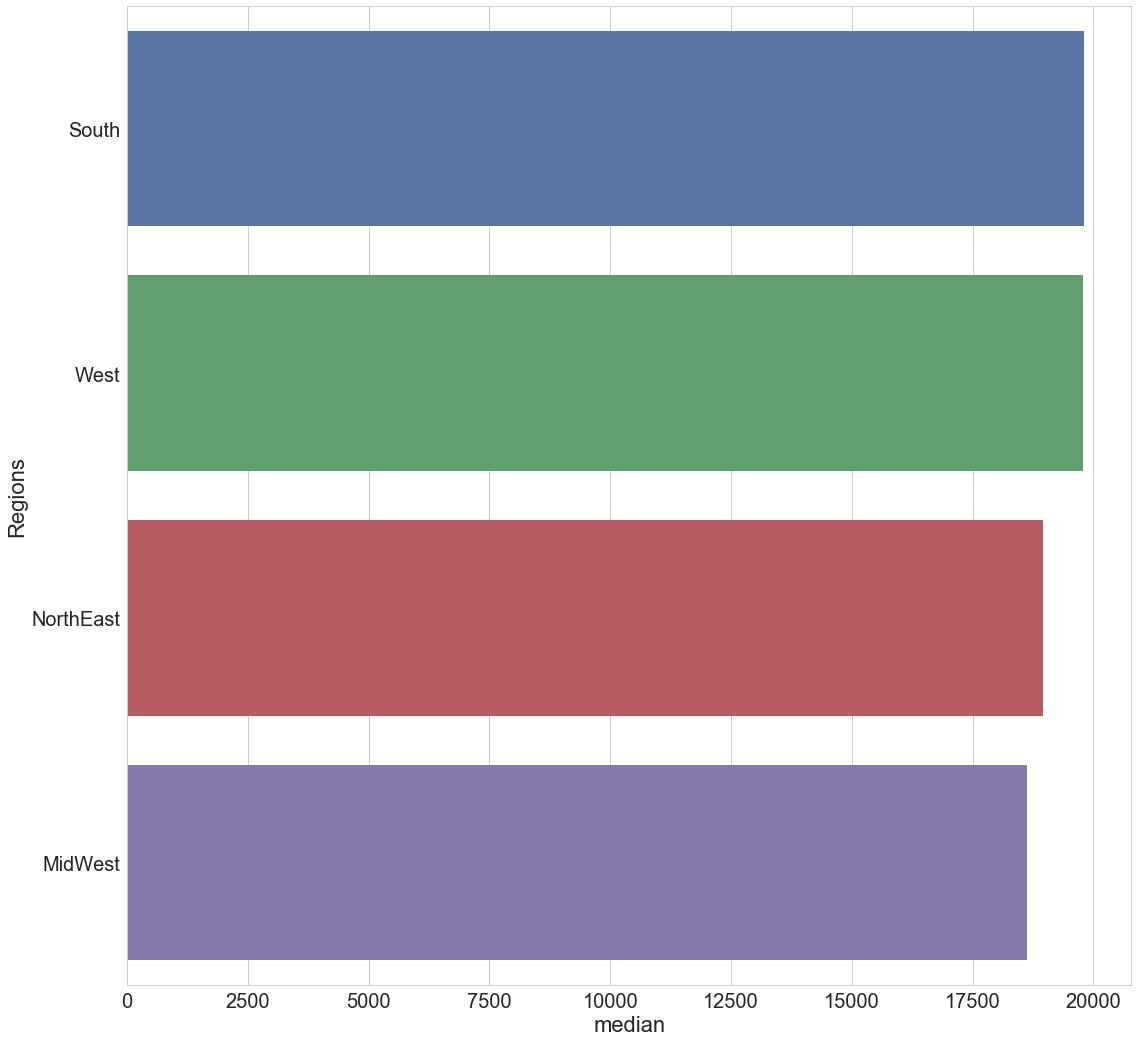

In [118]:
regions.sort_values('median', ascending=False, inplace=True)
sns.barplot(x="median", y="Regions", data=regions, label="Median")

## Mean and Median overlap Car Price by Region

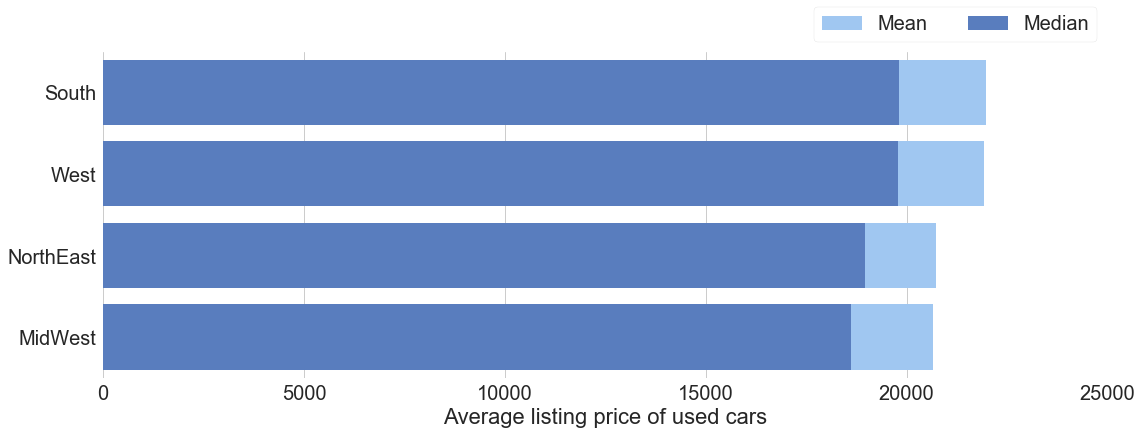

In [119]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price_fs", y="Regions", data=regions, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Regions", data=regions, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

## Chevy Median price by State

In [96]:
chevy = df[(df["make_ss"] == "Chevrolet")]
chevy = pd.DataFrame(chevy.groupby('State full').median())
chevy = chevy.reset_index()

ford = df[(df["make_ss"] == "Ford")]
ford = pd.DataFrame(ford.groupby('State full').median())
ford = ford.reset_index()

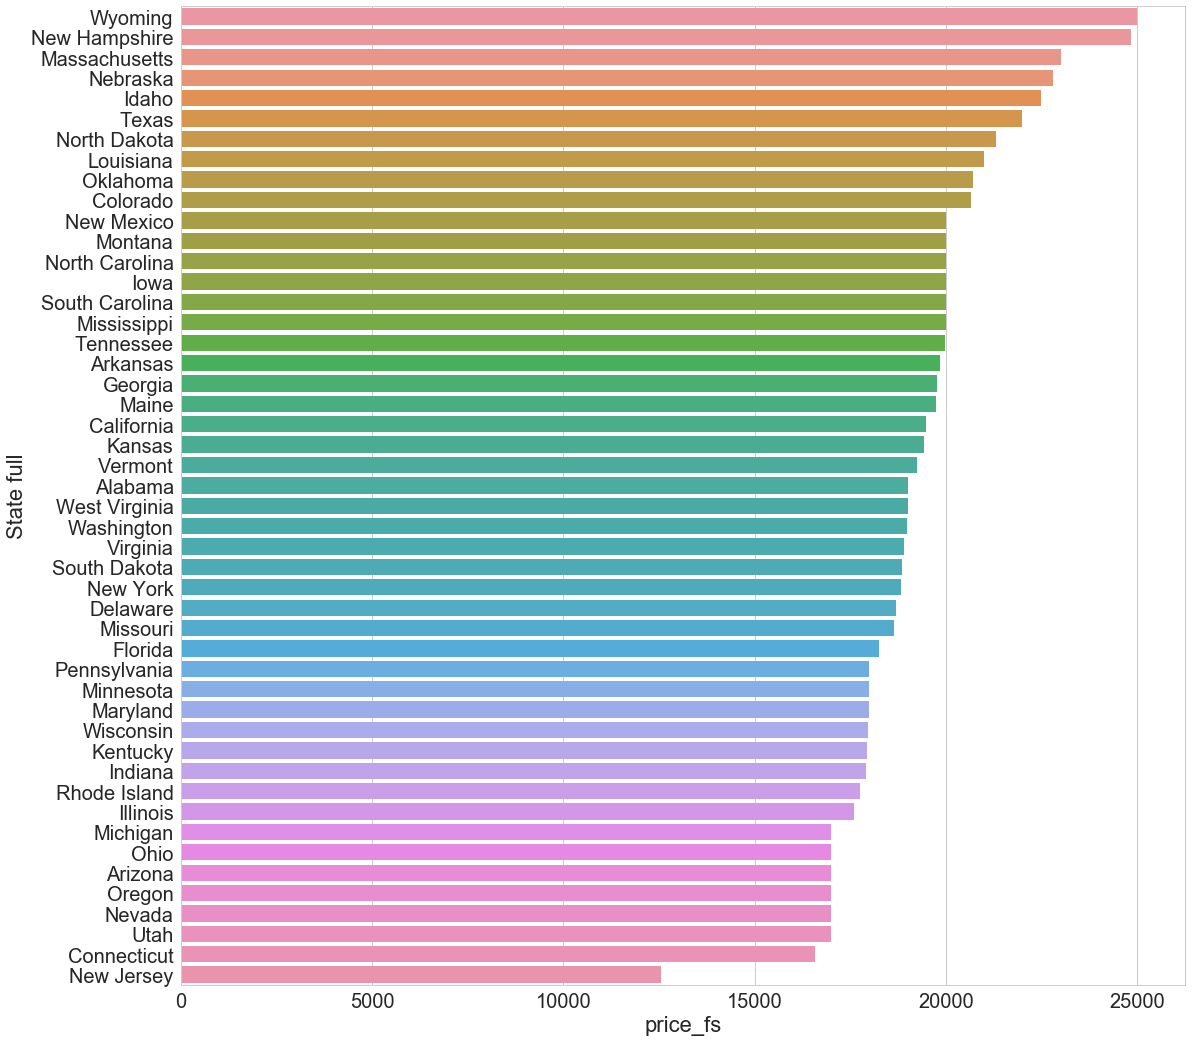

In [120]:
chevy.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=chevy, label="Median")

## Ford Median price by State

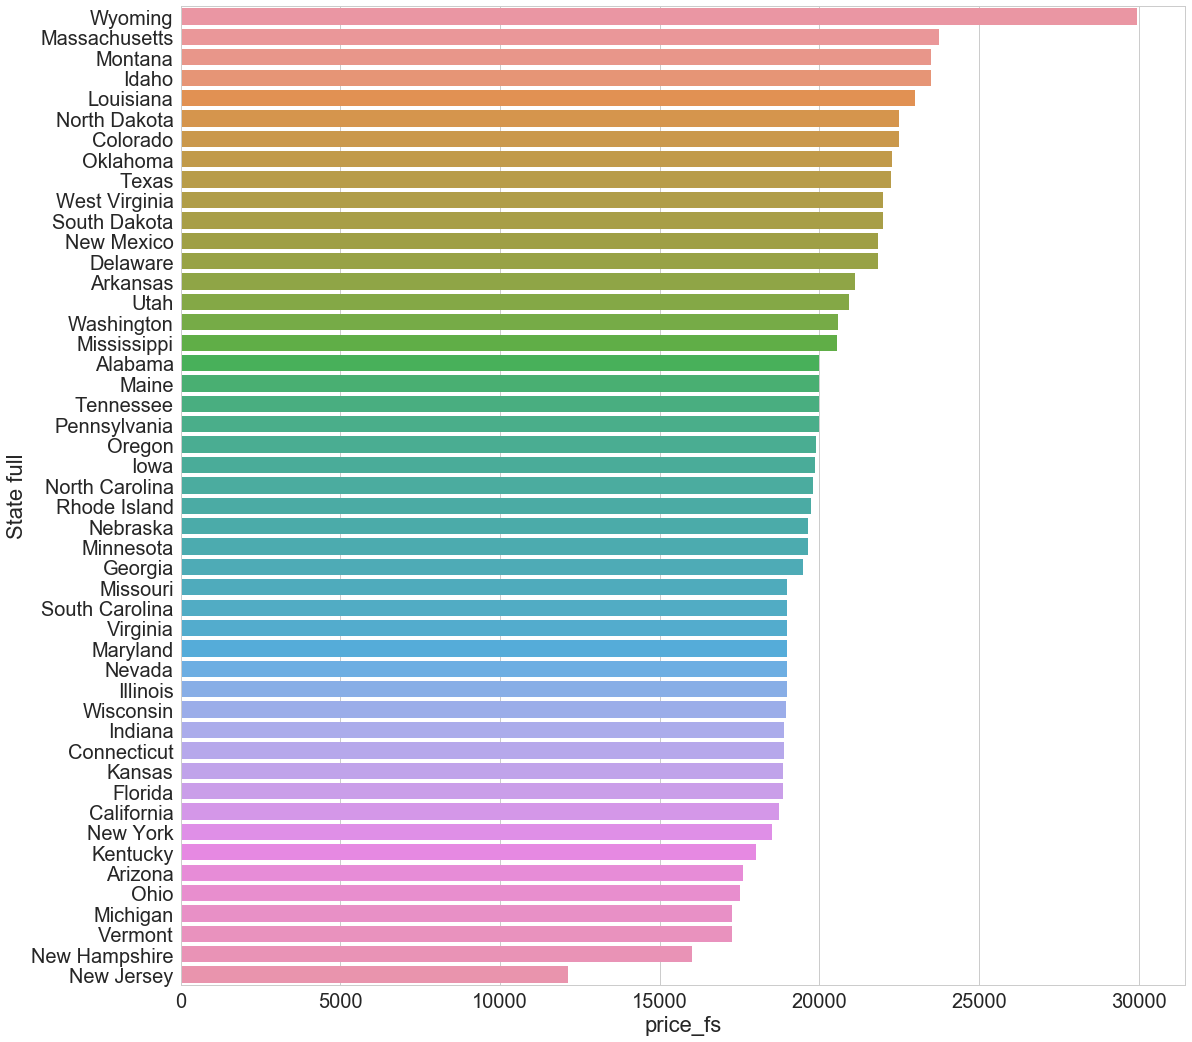

In [121]:
ford.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=ford, label="Median")